<a href="https://colab.research.google.com/github/alvinsenjaya/TomatoPlantDiseases/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [0]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# **Download Dataset**

In [0]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxx"

In [3]:
!kaggle datasets download noulam/tomato

 99% 737M/743M [00:20<00:00, 40.4MB/s]
100% 743M/743M [00:20<00:00, 37.6MB/s]


In [0]:
!unzip tomato.zip

# **Image Preprocessing**

In [5]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

# **Define Learning Parameter**

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# **Begin Training**

In [8]:
history = model.fit(train_generator, epochs=40, validation_data=validation_generator)

Epoch 1/40
144/144 [==============================] - 291s 2s/step - loss: 3.0431 - accuracy: 0.3193 - val_loss: 1.4766 - val_accuracy: 0.4772
Epoch 2/40
144/144 [==============================] - 294s 2s/step - loss: 1.4869 - accuracy: 0.4982 - val_loss: 1.0813 - val_accuracy: 0.6336
Epoch 3/40
144/144 [==============================] - 297s 2s/step - loss: 1.1416 - accuracy: 0.6179 - val_loss: 0.9123 - val_accuracy: 0.6875
Epoch 4/40
144/144 [==============================] - 297s 2s/step - loss: 0.8855 - accuracy: 0.6969 - val_loss: 1.0272 - val_accuracy: 0.6796
Epoch 5/40
144/144 [==============================] - 300s 2s/step - loss: 0.7879 - accuracy: 0.7412 - val_loss: 0.6349 - val_accuracy: 0.7749
Epoch 6/40
144/144 [==============================] - 301s 2s/step - loss: 0.6700 - accuracy: 0.7827 - val_loss: 0.6283 - val_accuracy: 0.7996
Epoch 7/40
144/144 [==============================] - 300s 2s/step - loss: 0.6069 - accuracy: 0.8061 - val_loss: 0.4400 - val_accuracy: 0.8628

# **Plot Training Results**

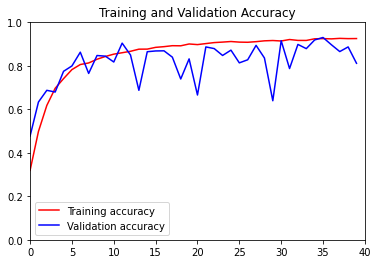

<Figure size 432x288 with 0 Axes>

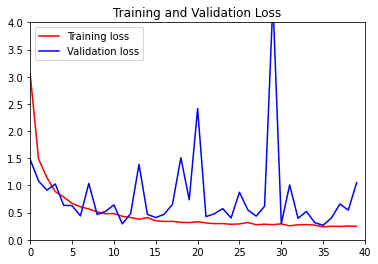

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0, 1)
plt.xlim(0, 40)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.ylim(0, 4)
plt.xlim(0, 40)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [10]:
export_path = "/content/saved_model"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_model/assets

Saved model:
total 140
drwxr-xr-x 2 root root   4096 May 29 04:51 assets
-rw-r--r-- 1 root root 133086 May 29 04:51 saved_model.pb
drwxr-xr-x 2 root root   4096 May 29 04:51 variables


# **Download Saved Model**

In [11]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 64%)
  adding: content/saved_model/variables/variables.data-00001-of-00002 (deflated 18%)
  adding: content/saved_model/variables/variables.data-00000-of-00002 (deflated 77%)
  adding: content/saved_model/saved_model.pb (deflated 88%)


In [0]:
files.download("/content/saved_model.zip")

# **Upload Saved Model**

In [0]:
uploaded = files.upload()
!unzip /content/saved_model.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Try Classification**

In [13]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(256, 256))
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")

Saving datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg to datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg


Result :
Mosaic Virus
